## Cluster Analysis (군집분석)

비지도학습(Unsupervised Learning)에 속하는 머신러닝 기법.

- eg: pattern recognition, image analysis, bioinformatics, customer segmentation

### K-Means Clustering Algorithm
n개의 data와 k개라는 class 갯수가 주어졌을때, 각각의 class들에 속한 점들간의 분산을 최소화하는게 k-clustering의 목적입니다. 즉, 근처에 있는 data들끼리 모아서 하나의 class로 선언하는 방식입니다.

![Random Unsplash Image](https://www.ncbi.nlm.nih.gov/books/NBK543520/bin/463627_1_En_9_Fig4_HTML.jpg)

k-means 알고리즘은 cluster의 중심이 되는 cluster centroid를 임의로 k개 만큼 선정하고, 각 점으로부터 거리를 계산하여 모든 data의 Class를 할당, 모든 Class들의 무게중심으로 centroid를 이동, 다시 각 점으로부터의 거리를 계싼하여 class할당... 을 반복하는 알고리즘입니다. 이후 cluster centeroid가 최적의 위치로 이동하게 되면, 더이상 이동하지 않으며, 그때 iteration을 종료하게됩니다. 




- 참고영상: https://www.youtube.com/watch?v=YIGtalP1mv0

- 데이터 출처: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python


#### Pros 

- 쉽고 간편한 연산
- 큰 데이터셋에 적응가능(scalable)
- 패턴이 뚜렷하지 않은 데이터에도 적용 가능

#### Cons

- k 값을 임의로 정해야 함
- outlier에 민감함

### Import & Explore Data

In [48]:
#import data

import pandas as pd
import numpy as np

df = pd.read_csv("Mall_Customers.csv")
df.tail(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
180,181,Female,37,97,32
181,182,Female,32,97,86
182,183,Male,46,98,15
183,184,Female,29,98,88
184,185,Female,41,99,39
185,186,Male,30,99,97
186,187,Female,54,101,24
187,188,Male,28,101,68
188,189,Female,41,103,17
189,190,Female,36,103,85


#### 데이터 클리닝 할 때 유용한것들 몇가지
- df.shape : 크기확인
- df.rename(columns = {'old_name' : 'new_name'}) : columns 이름 바꿔주기
- df.stypes : 데이터 타입 확인
- df.describe() : 각 컬럼의 데이터를 요약해서 보여줌
- df.isnull().sum() : null 값 확인
- df.dropna(how = "all") : 모든 null값 삭제 
- df.columnname.unique() : unique 한 값들 보여줌
- len(df.columnname.unique()) : 해당 컬럼에 unique 한 값이 몇개인지 확인 

In [3]:
df.rename(columns = {'CustomerID' : 'id', 'Gender': 'gender', 'Age' : 'age', 'Annual Income (k$)':'annual_income', 'Spending Score (1-100)': 'spending_score'}, inplace = True)
df.head()

,id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
print(df['age'].max())
print(df['spending_score'].mean())

70
50.2


In [5]:
df.shape

(200, 5)

In [6]:
df.dtypes

id                 int64
gender            object
age                int64
annual_income      int64
spending_score     int64
dtype: object

In [7]:
df.describe()

,id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.isnull().sum()

#만약 null 값이 있으면, df = df.dropna(how='all')

id                0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [9]:
df.gender.unique()

array(['Male', 'Female'], dtype=object)

In [10]:
len(df.id.unique())

200

### Groupby

* 공식문서: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

In [11]:
# group customers by 'gender',
# and count the number of customers in each group. 

df2 = df.groupby('gender').id.count().reset_index()
df2

,gender,id
0,Female,112
1,Male,88


In [12]:
# group customers by 'gender', 
# and calculate the average age per gender using mean() method.

df3 = df.groupby('gender').age.mean().reset_index()
df3

,gender,age
0,Female,38.098214
1,Male,39.806818


In [13]:
# group customers by 'gender' and 'age',  
# and calculate the average annual income using mean() method.

df4 = df.groupby(['gender', 'age']).annual_income.mean().reset_index()
df4

,gender,age,annual_income
0,Female,18,65.00
1,Female,19,64.00
2,Female,20,26.50
3,Female,21,44.75
4,Female,22,37.00
...,...,...,...
82,Male,66,63.00
83,Male,67,45.00
84,Male,68,63.00
85,Male,69,44.00


### One Hot Encoding

기계가 읽어들일수 없는 값들(Categorical Variables)을 1과 0의 숫자로 변환하는 과정

- **pd.get_dummies(df, coulmns = ['column_name'])**

![Random Unsplash Image](https://miro.medium.com/max/1400/1*O_pTwOZZLYZabRjw3Ga21A.png)


- 공식문서: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
- 참고용 블로그: https://blog.naver.com/oys0608/222324158962

In [14]:
df = pd.get_dummies(df, columns = ['gender'])
df.head()

,id,age,annual_income,spending_score,gender_Female,gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


### Normalisation 

분석 전에 데이터를 정규화(normalization)하여 데이터의 스케일을 0과 1사이로 맞춰주는 작업. 

![Random Unsplash Image](https://i2.wp.com/cmdlinetips.com/wp-content/uploads/2020/06/Quantile_Normalization_in_Python.png?w=379&ssl=1)

![Random Unsplash Image](https://i0.wp.com/cmdlinetips.com/wp-content/uploads/2020/06/Boxplot_after_Quantile_Normalization_Seaborn.png?w=603&ssl=1)

* sklearn.preprocessing 라이브러리의 MinMaxScaler 클래스 이용. 

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[ : ] = scaler.fit_transform(df[ : ])

In [16]:
df

,id,age,annual_income,spending_score,gender_Female,gender_Male
0,0.000000,0.019231,0.000000,0.387755,0.0,1.0
1,0.005025,0.057692,0.000000,0.816327,0.0,1.0
2,0.010050,0.038462,0.008197,0.051020,1.0,0.0
3,0.015075,0.096154,0.008197,0.775510,1.0,0.0
4,0.020101,0.250000,0.016393,0.397959,1.0,0.0
...,...,...,...,...,...,...
195,0.979899,0.326923,0.860656,0.795918,1.0,0.0
196,0.984925,0.519231,0.909836,0.275510,1.0,0.0
197,0.989950,0.269231,0.909836,0.744898,0.0,1.0
198,0.994975,0.269231,1.000000,0.173469,0.0,1.0


### Customer Segmentation with K-Means Clustering 

In [17]:
df=df.drop(['id'],axis=1)

In [18]:
from sklearn.cluster import KMeans

# WCSS (Within-Cluster-Sum-of-Squares  is the sum of squares of the distances of each data point in all clusters to their respective centroids.)

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

C:\Users\Q522478\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


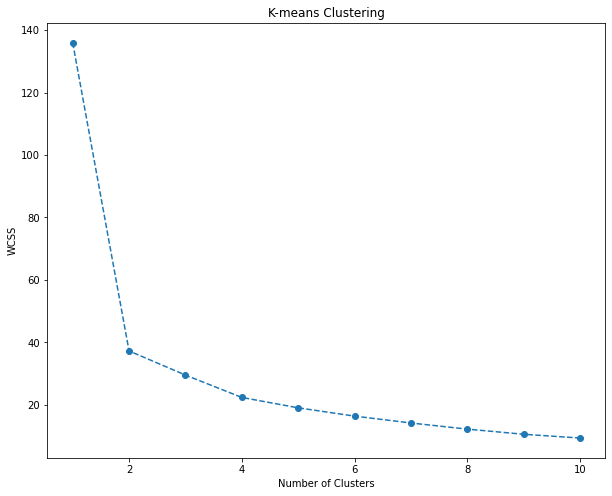

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [25]:
# We run K-means with a fixed number of clusters. In our case 2.
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [26]:
kmeans.fit(df)

KMeans(n_clusters=4, random_state=42)

In [27]:
df_segm_kmeans = df.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [28]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).sum()
df_segm_analysis

,age,annual_income,spending_score,gender_Female,gender_Male
Segment K-means,,,,,
0,29.019231,18.655738,13.816327,0.0,48.0
1,11.442308,20.868852,38.785714,57.0,0.0
2,7.884615,15.409836,28.846939,0.0,40.0
3,31.846154,19.754098,18.959184,55.0,0.0


In [35]:
from sklearn.cluster import DBSCAN
from itertools import product

df = pd.read_csv("Mall_Customers.csv")

x=df.iloc[:,[2,3]].values

In [40]:
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [41]:
model=db.fit(x)

In [42]:
label=model.labels_
label

array([ 0,  0,  0,  0, -1,  0,  1,  0, -1, -1, -1,  1, -1,  0,  1,  0,  1,
        0, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  2,  3,  2, -1,  2,  3,  3,  3,  2,
        3,  3, -1,  2,  2,  2,  4, -1,  2,  4, -1,  4, -1, -1, -1, -1,  4,
       -1, -1,  4, -1, -1, -1, -1, -1,  5, -1, -1,  5, -1, -1, -1,  5, -1,
        5, -1, -1, -1,  6, -1,  7,  6, -1, -1,  7,  6,  7,  6,  7,  7,  6,
        8,  7,  6,  7,  8, -1,  8,  8,  8,  7,  9,  7,  7,  7,  8,  6,  6,
        6, -1,  9,  9,  9, -1, 10,  9,  9, -1,  9, -1,  9, -1, 10, -1, 10,
       -1, 10, -1, -1, -1, 10, 10, 10, 10, 10, -1, 10, 10, 10, -1, 10, -1,
       10, -1, 10, 10, 10, 10, 10, -1, 10, -1, 10, -1, 11, -1, -1, 11, 12,
       -1, 12, 11, 11, -1, 12, -1, 12, -1, -1, -1, 13, -1, 13, -1, 13, -1,
       13, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [43]:
from sklearn import metrics

sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 14


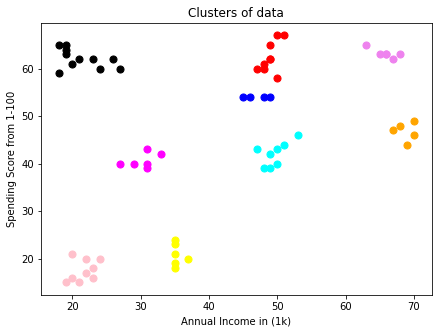

In [44]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters of data')
plt.show()